In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas
from IPython.display import display

In [2]:
adult_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Adult.csv")
compas_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Compas.csv")
bank_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data Bank.csv")
german_df = pandas.read_csv("AIF360 Debiasing Algo Analysis - Data German.csv")

for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"]
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    df["Accuracy Diff"] = df["Accuracy - Unprivileged"] - df["Accuracy - Privileged"]
    df["False Omission Rate Diff"] = df["False Omission Rate - Unprivileged"] - df["False Omission Rate - Privileged"]
    df["False Discovery Rate Diff"] = df["False Discovery Rate - Unprivileged"] - df["False Discovery Rate - Privileged"]
    df["Statistical Parity Diff"] = df["Base Rate - Unprivileged"] - df["Base Rate - Privileged"]
    df["F1 Score Diff"] = df["F1 Score - Unprivileged"] - df["F1 Score - Privileged"]
    df.drop('Theil Index', axis=1, inplace=True)
    df.drop('Consistency', axis=1, inplace=True)
    for metric in df.columns:
        if "Num" in metric:
            df.drop(metric, axis=1, inplace=True)

In [3]:
def num_interventions(name):
    if name == "Logistic Regression" or name  == "Meta Classifier":
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3

In [4]:
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df["Adult"]):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
print(no_int)
print(one_int)
print(two_int)
print(three_int)

['Logistic Regression']
['RW', 'DIR', 'EGR', 'GSR', 'PR', 'CEOP', 'ROC', 'EOP']
['RW + EGR', 'RW + GSR', 'RW + PR', 'RW + CEOP', 'RW + ROC', 'RW + EOP', 'DIR + EGR', 'DIR + GSR', 'DIR + PR', 'DIR + CEOP', 'DIR + ROC', 'DIR + EOP', 'EGR + CEOP', 'EGR + ROC', 'EGR + EOP', 'GSR + CEOP', 'GSR + ROC', 'GSR + EOP', 'PR + CEOP', 'PR + ROC', 'PR + EOP']
['RW + EGR + CEOP', 'RW + EGR + ROC', 'RW + EGR + EOP', 'RW + GSR + CEOP', 'RW + GSR + ROC', 'RW + GSR + EOP', 'RW + PR + CEOP', 'RW + PR + ROC', 'RW + PR + EOP', 'DIR + EGR + CEOP', 'DIR + EGR + ROC', 'DIR + EGR + EOP', 'DIR + GSR + CEOP', 'DIR + GSR + ROC', 'DIR + GSR + EOP', 'DIR + PR + CEOP', 'DIR + PR + ROC', 'DIR + PR + EOP']


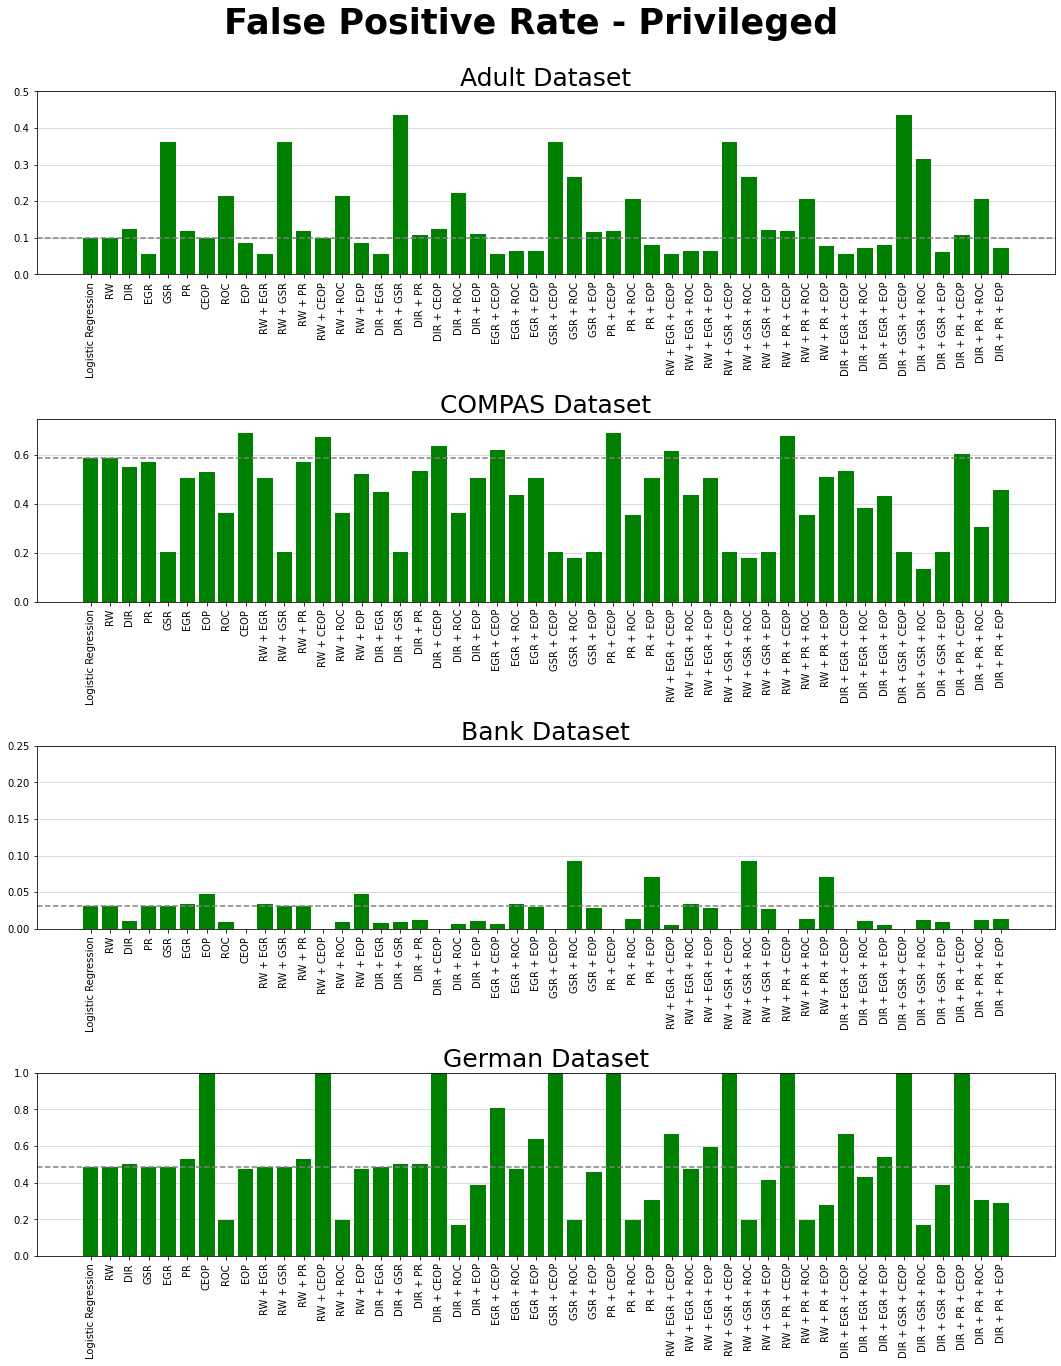

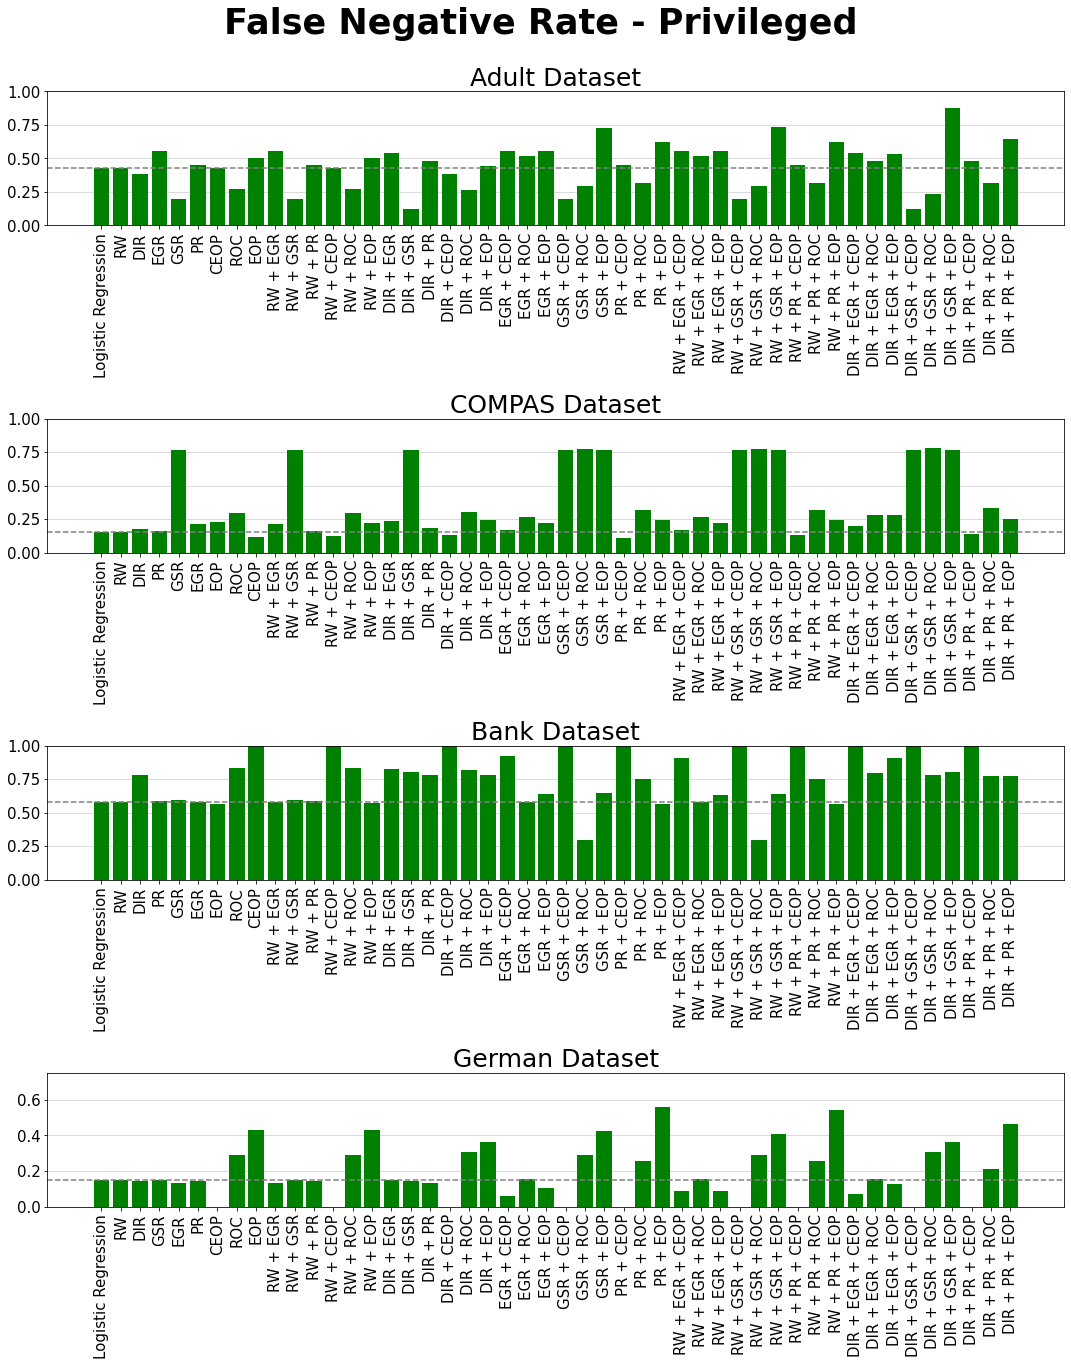

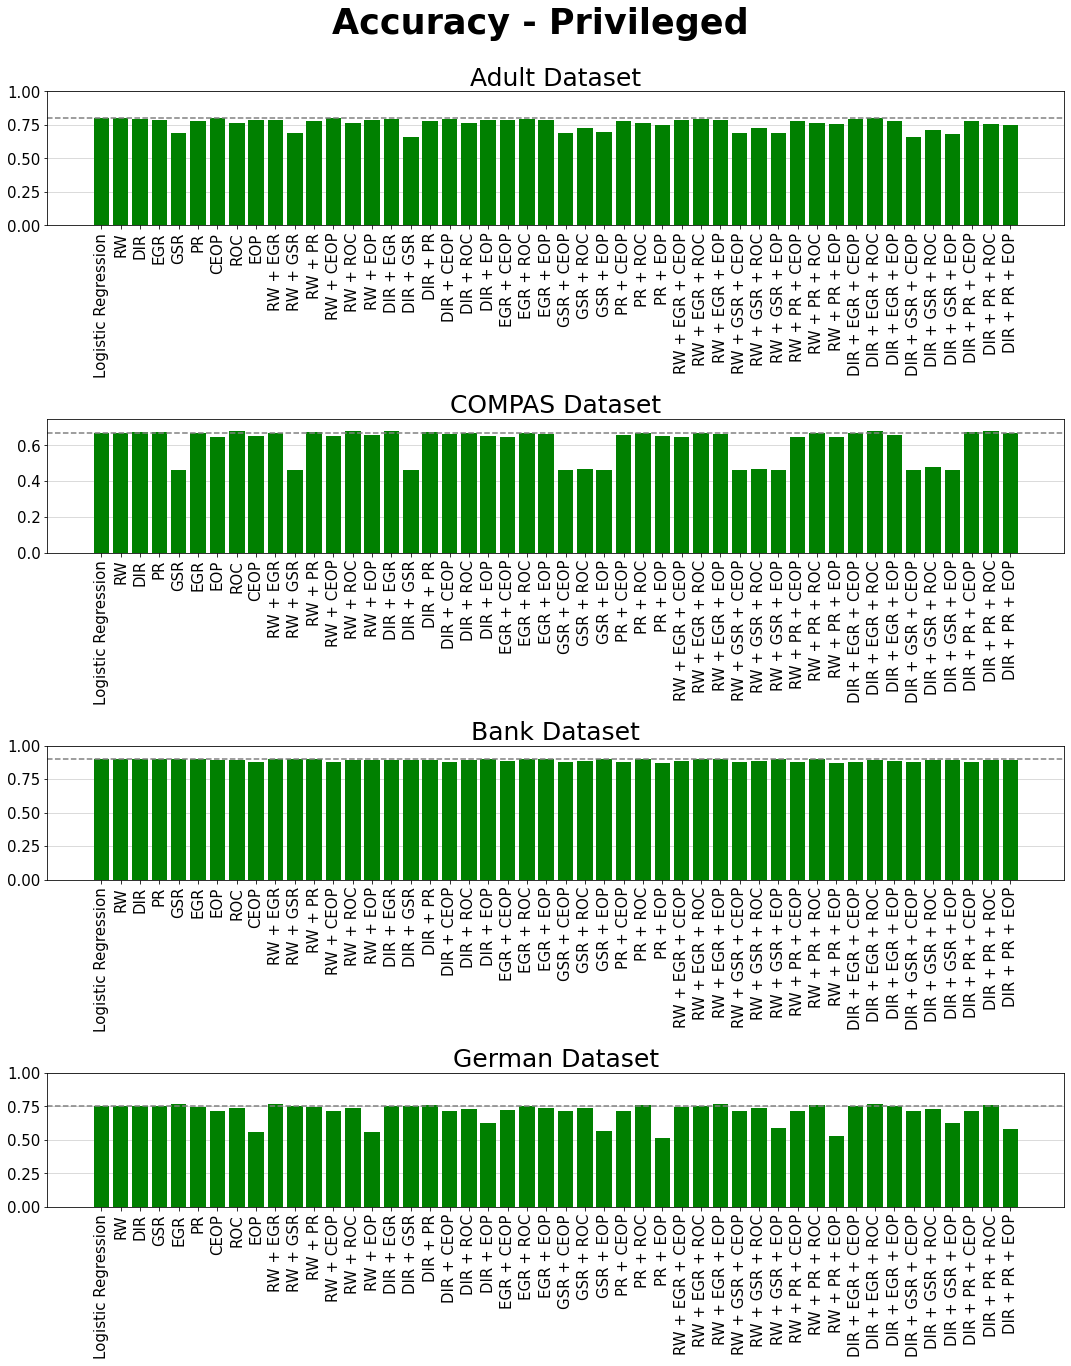

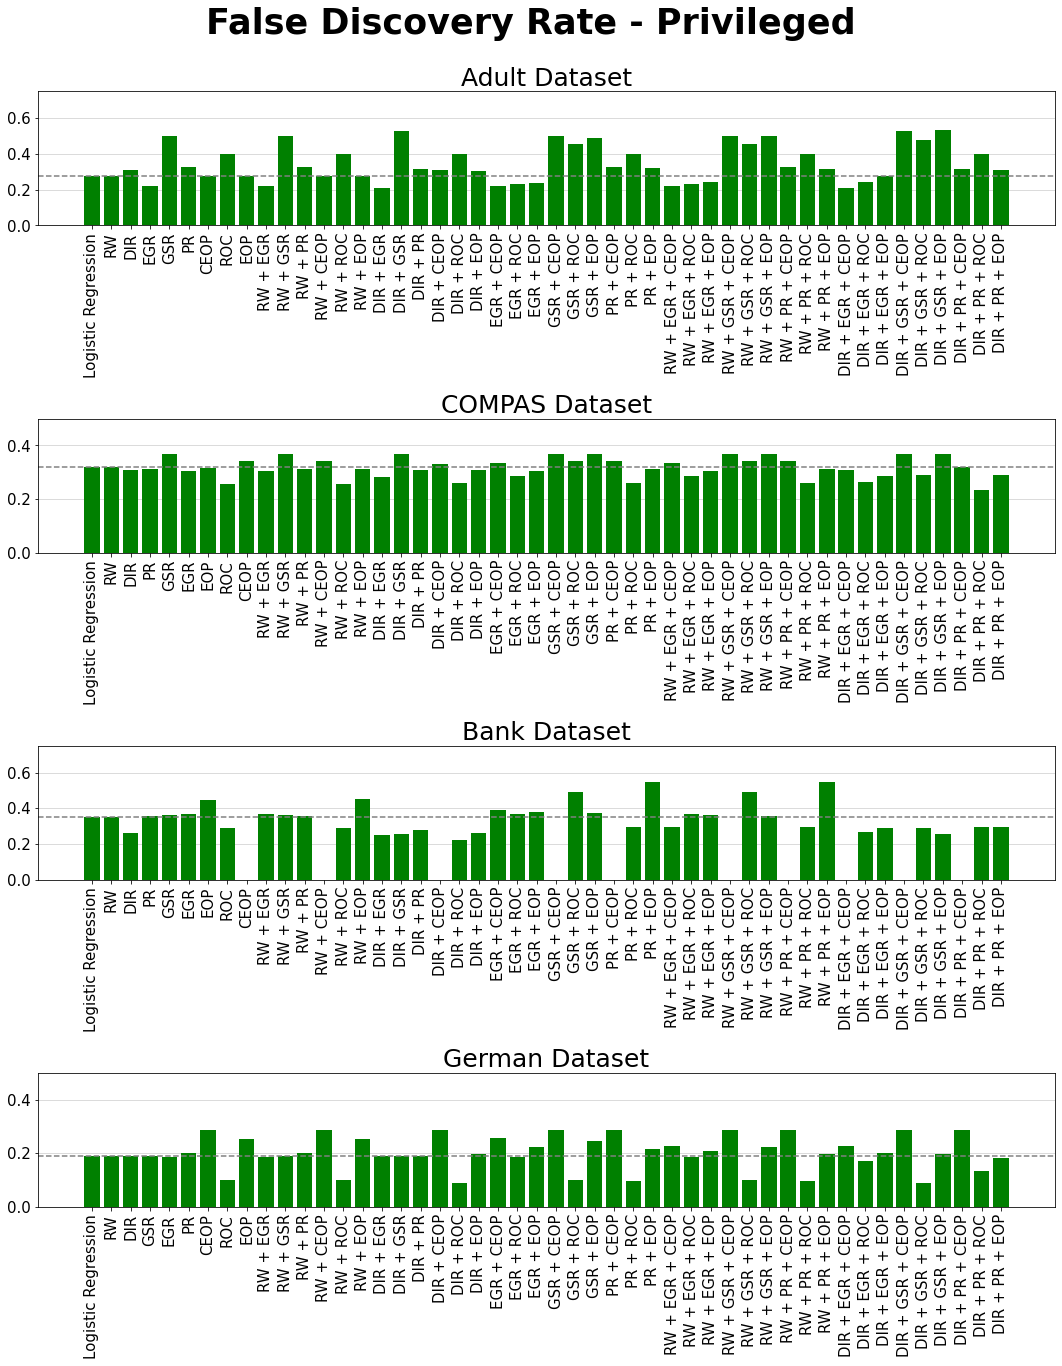

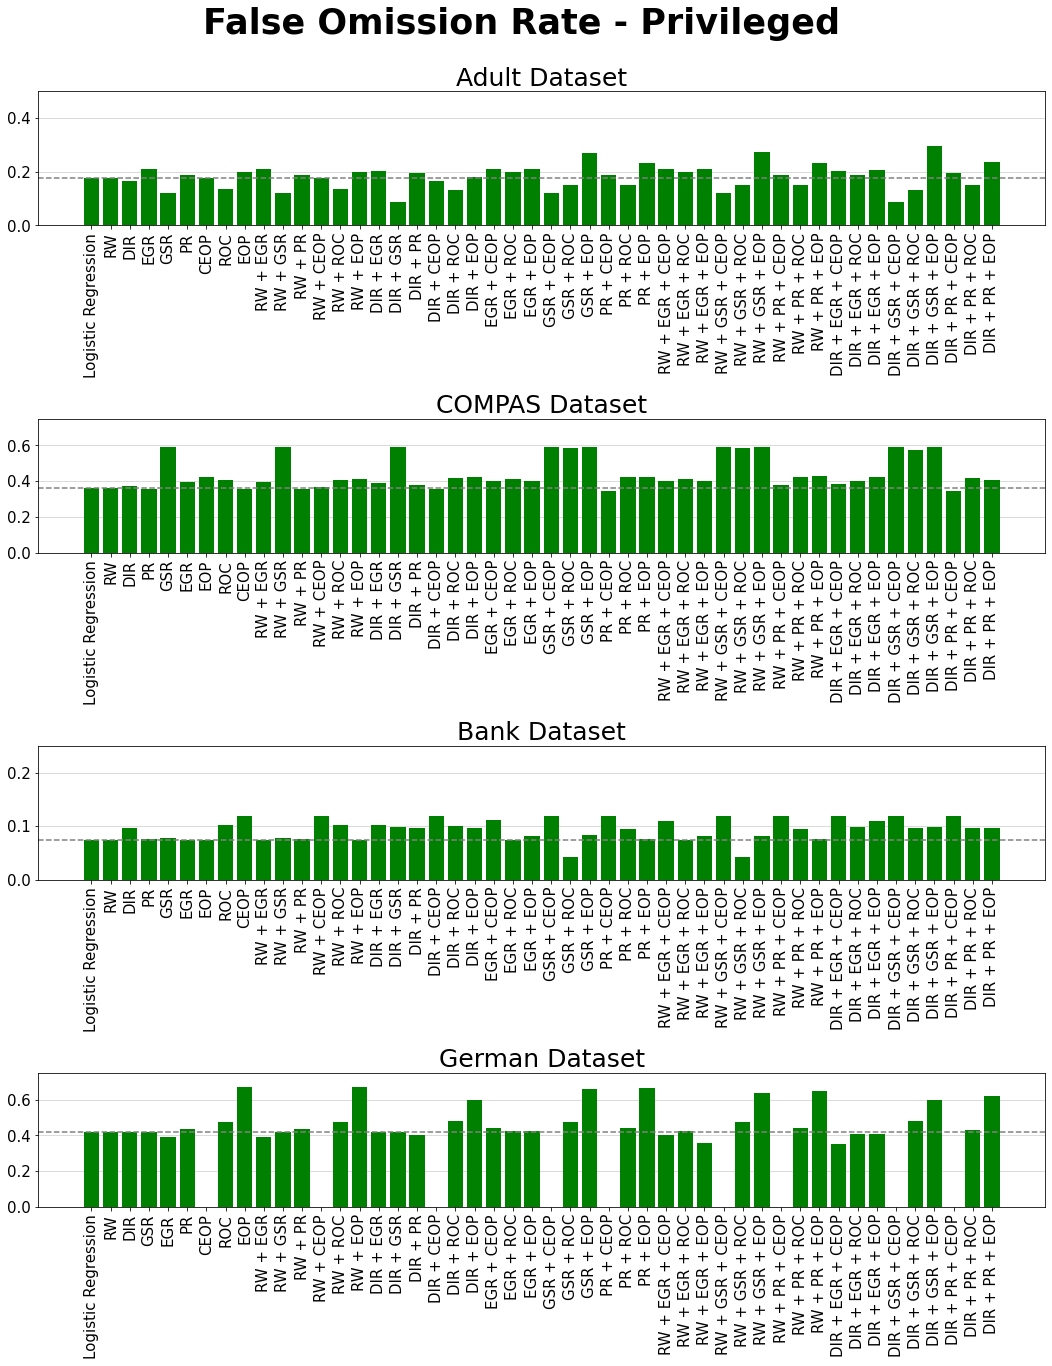

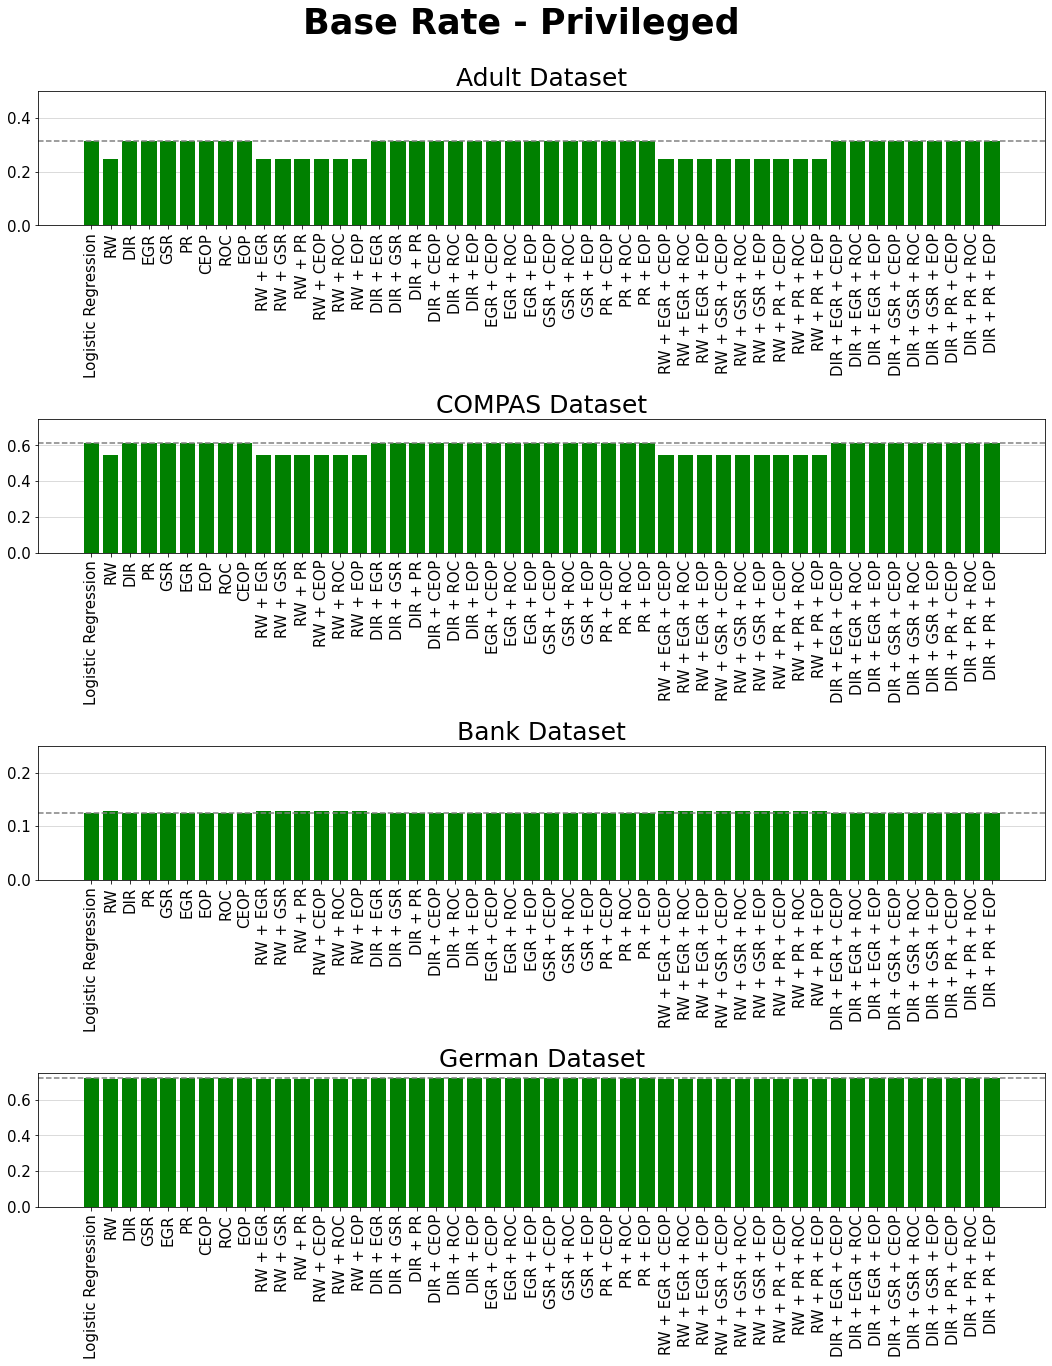

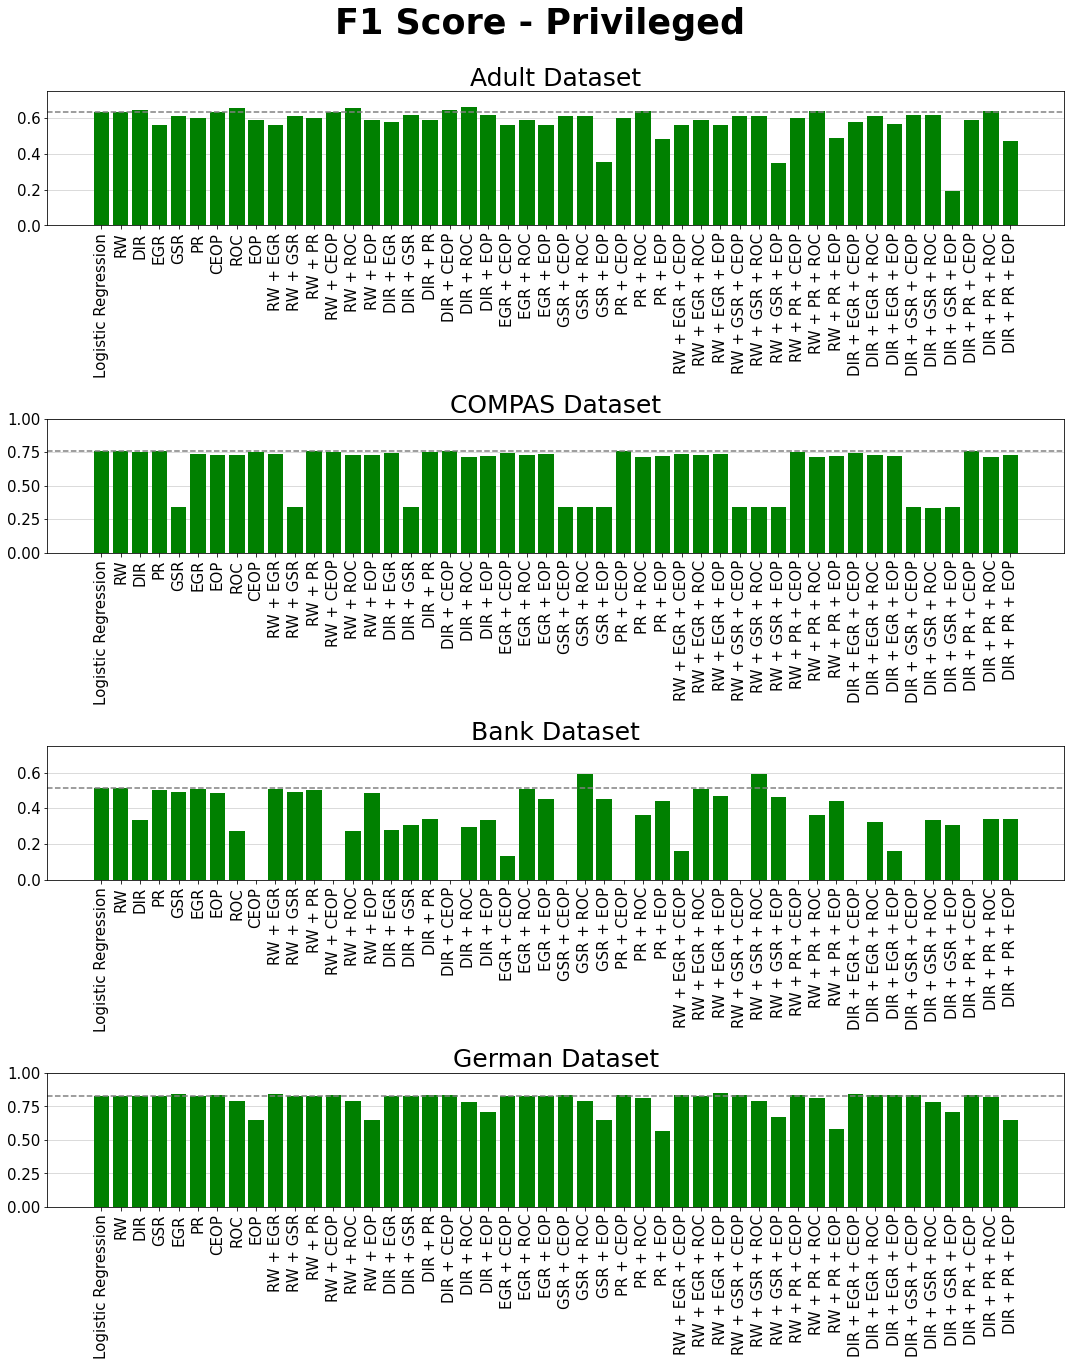

In [5]:
def create_graph(fairness_metric):
    def get_limits(max_val):
        if max_val < 0.25:
            return [0.0,0.25]
        if max_val < 0.5:
            return [0.0,0.5]
        if max_val < 0.75:
            return [0.0,0.75]
        return [0.0,1.0]
    
    fig, ax = plt.subplots(4, figsize=(15, 20))
    
    ax[0].patch.set_facecolor('white')
    ax[0].patch.set_alpha(1.0)
    ax[0].set_title("Adult Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(adult_df[fairness_metric])
    Labels=list(adult_df["Adult"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[0])
    plt.xticks(y_pos, Labels)
    #ax[0].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[0].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[0].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[0].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[0].set_ylim(get_limits(max(vals)))
    
    
    ax[1].patch.set_facecolor('white')
    ax[1].patch.set_alpha(1.0)
    ax[1].set_title("COMPAS Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(compas_df[fairness_metric])
    Labels=list(compas_df["Compas"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[1])
    plt.xticks(y_pos, Labels)
    #ax[1].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[1].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[1].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[1].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[1].set_ylim(get_limits(max(vals)))
    
    
    ax[2].patch.set_facecolor('white')
    ax[2].patch.set_alpha(1.0)
    ax[2].set_title("Bank Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(bank_df[fairness_metric])
    Labels=list(bank_df["Bank"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[2])
    plt.xticks(y_pos, Labels)
    #ax[2].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[2].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[2].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[2].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[2].set_ylim(get_limits(max(vals)))
    
    
    ax[3].patch.set_facecolor('white')
    ax[3].patch.set_alpha(1.0)
    ax[3].set_title("German Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(german_df[fairness_metric])
    Labels=list(german_df["German"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[3])
    plt.xticks(y_pos, Labels)
    #ax[3].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[3].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[3].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[3].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[3].set_ylim(get_limits(max(vals)))
        
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.yaxis.grid(color="lightgrey")
        ax.set_axisbelow(True)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.xaxis.label.set_size(20)
    fig.suptitle(fairness_metric,fontweight="bold",fontsize=35)
    fig.patch.set_alpha(1.0)
    
    plt.savefig("R3/" + fairness_metric + ".png", bbox_inches='tight', )

create_graph("False Positive Rate - Privileged")
create_graph("False Negative Rate - Privileged")
create_graph("Accuracy - Privileged")
create_graph("False Discovery Rate - Privileged")
create_graph("False Omission Rate - Privileged")
create_graph("Base Rate - Privileged")
create_graph("F1 Score - Privileged")

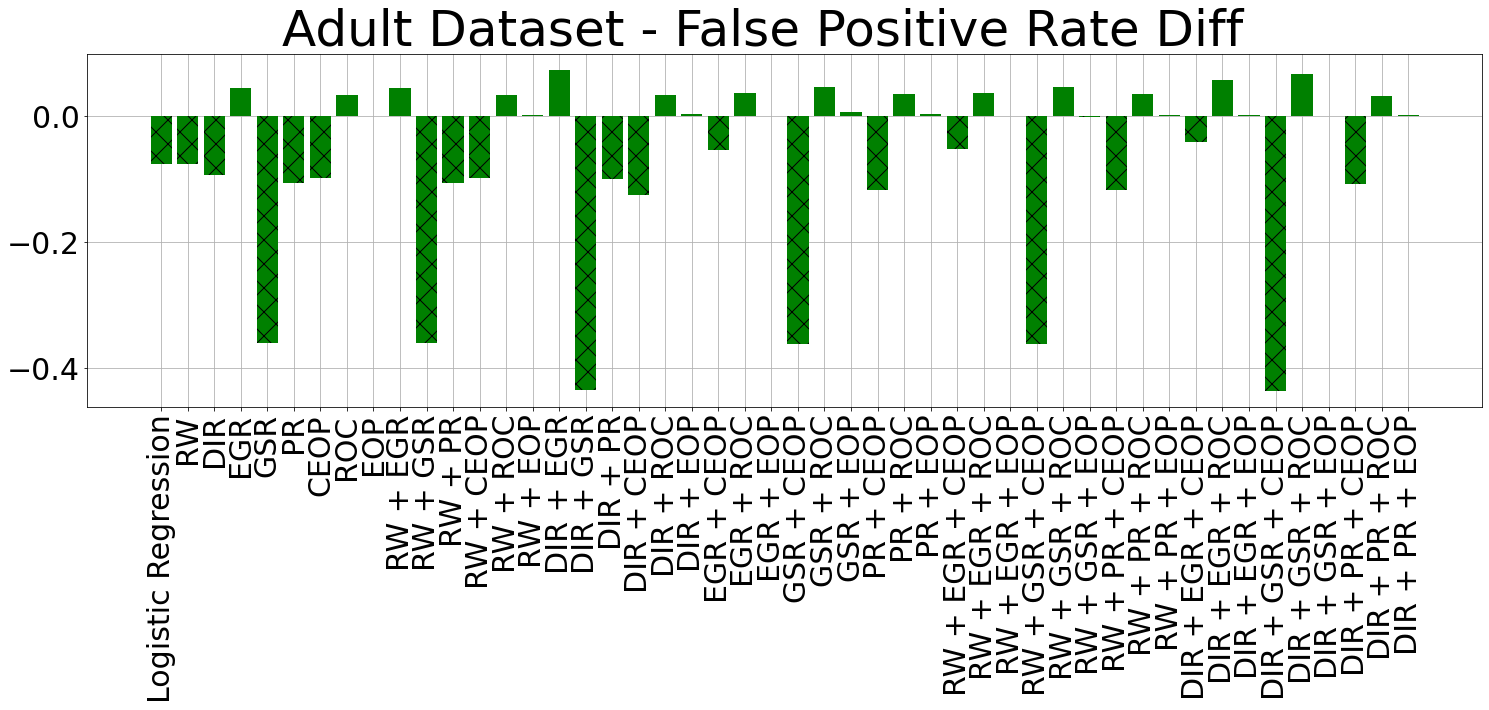

'create_value_graph("False Negative Rate Diff")\ncreate_value_graph("Accuracy Diff")\ncreate_value_graph("False Discovery Rate Diff")\ncreate_value_graph("False Omission Rate Diff")\ncreate_value_graph("Statistical Parity Diff")\ncreate_value_graph("F1 Score Diff")'

In [26]:
def create_value_graph(fairness_metric):
    pattern = []
    for val in adult_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in compas_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in bank_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in german_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    fig = plt.figure(figsize=(25,6.5))
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1.0)
    fig.suptitle("Adult Dataset - " + fairness_metric, fontsize=50)
    plt.rcParams.update({'font.size': 30})
    #plt.title("Adult Dataset - " + fairness_metric)
    y_vals = adult_df[fairness_metric]#abs(adult_df[fairness_metric])
    #plt.bar(adult_df["Adult"], y_vals, hatch=pattern)
    for intervention, i in zip(adult_df["Adult"], range(len(adult_df["Adult"]))):
        plt.bar(intervention, y_vals[i], color='g', hatch=pattern[i], zorder=3)
    plt.xticks(rotation=90)
    plt.grid(zorder=0)
    plt.savefig("R3/Adult Dataset - " + fairness_metric + ".png", bbox_inches='tight', )
    plt.show()

create_value_graph("False Positive Rate Diff")
'''create_value_graph("False Negative Rate Diff")
create_value_graph("Accuracy Diff")
create_value_graph("False Discovery Rate Diff")
create_value_graph("False Omission Rate Diff")
create_value_graph("Statistical Parity Diff")
create_value_graph("F1 Score Diff")'''

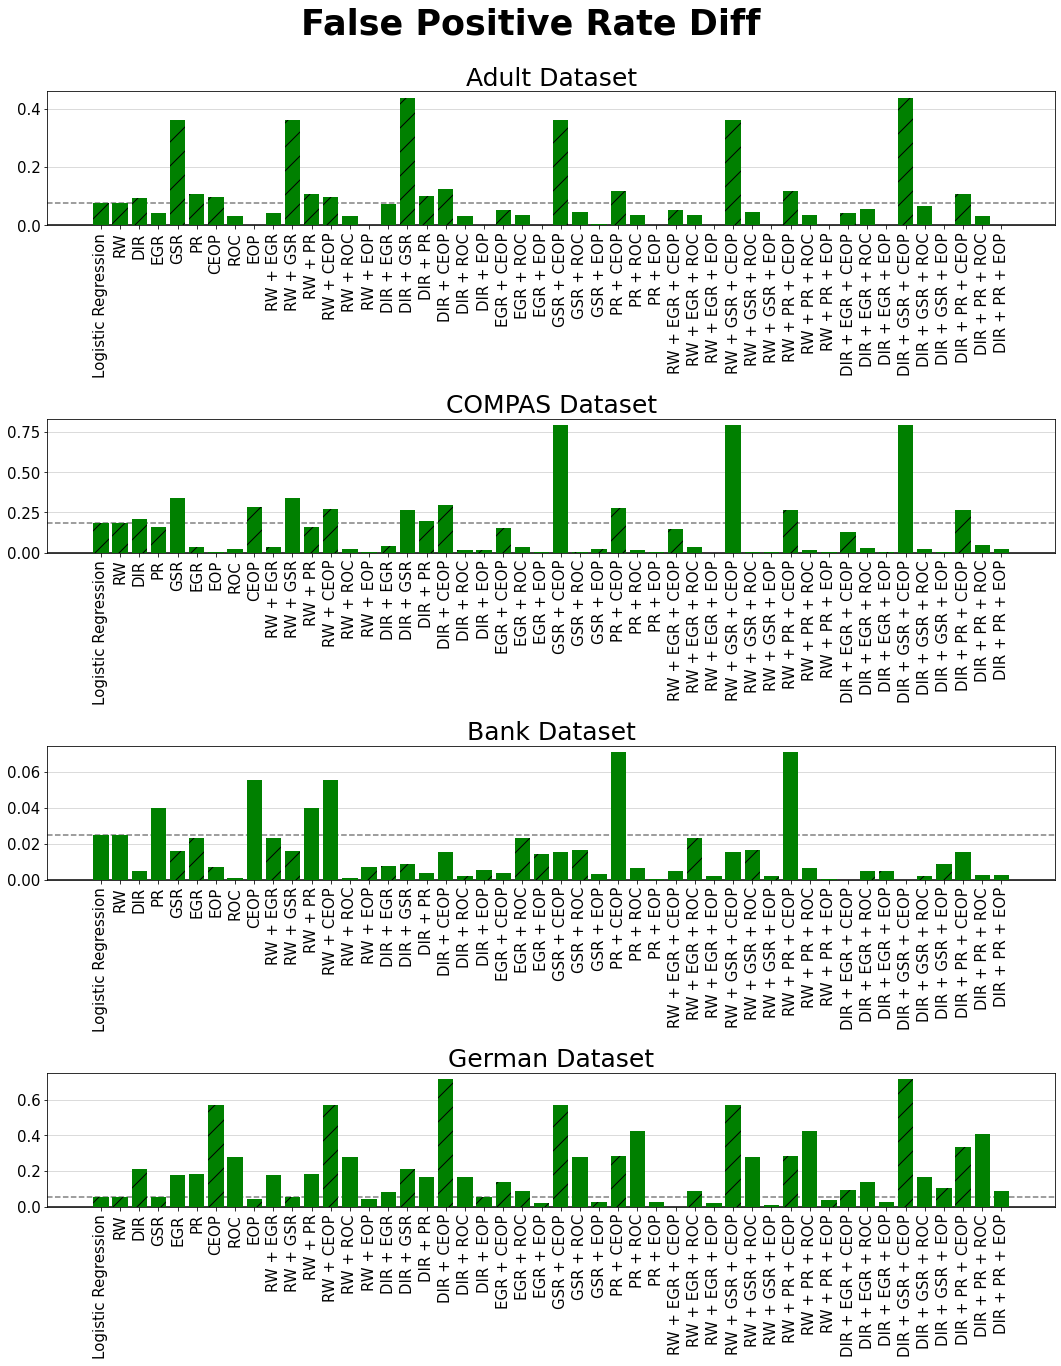

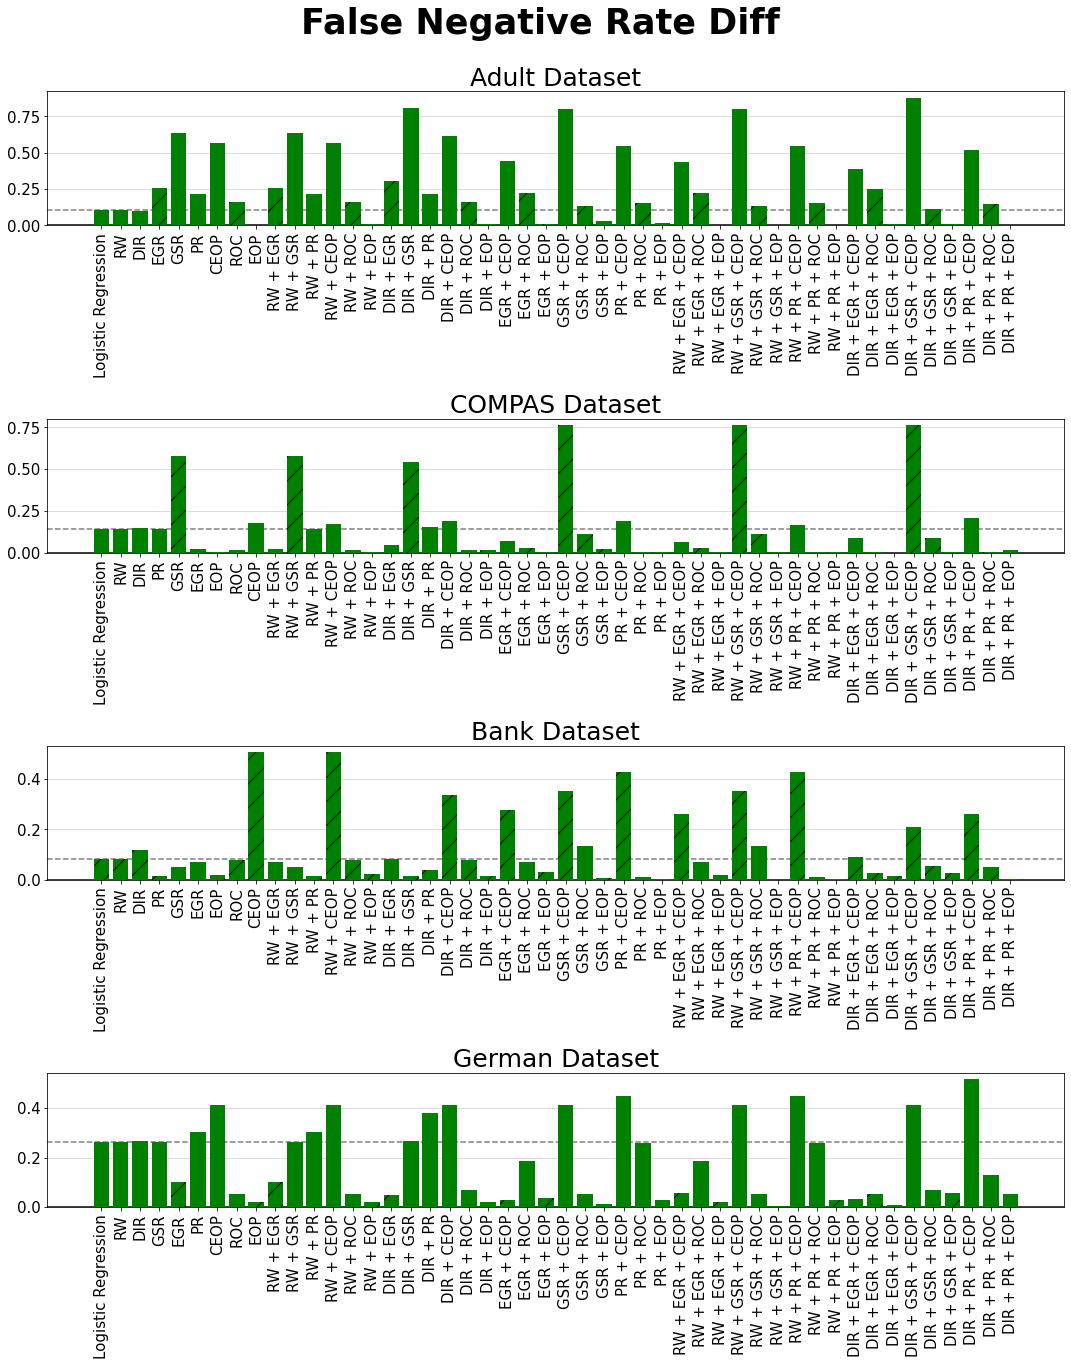

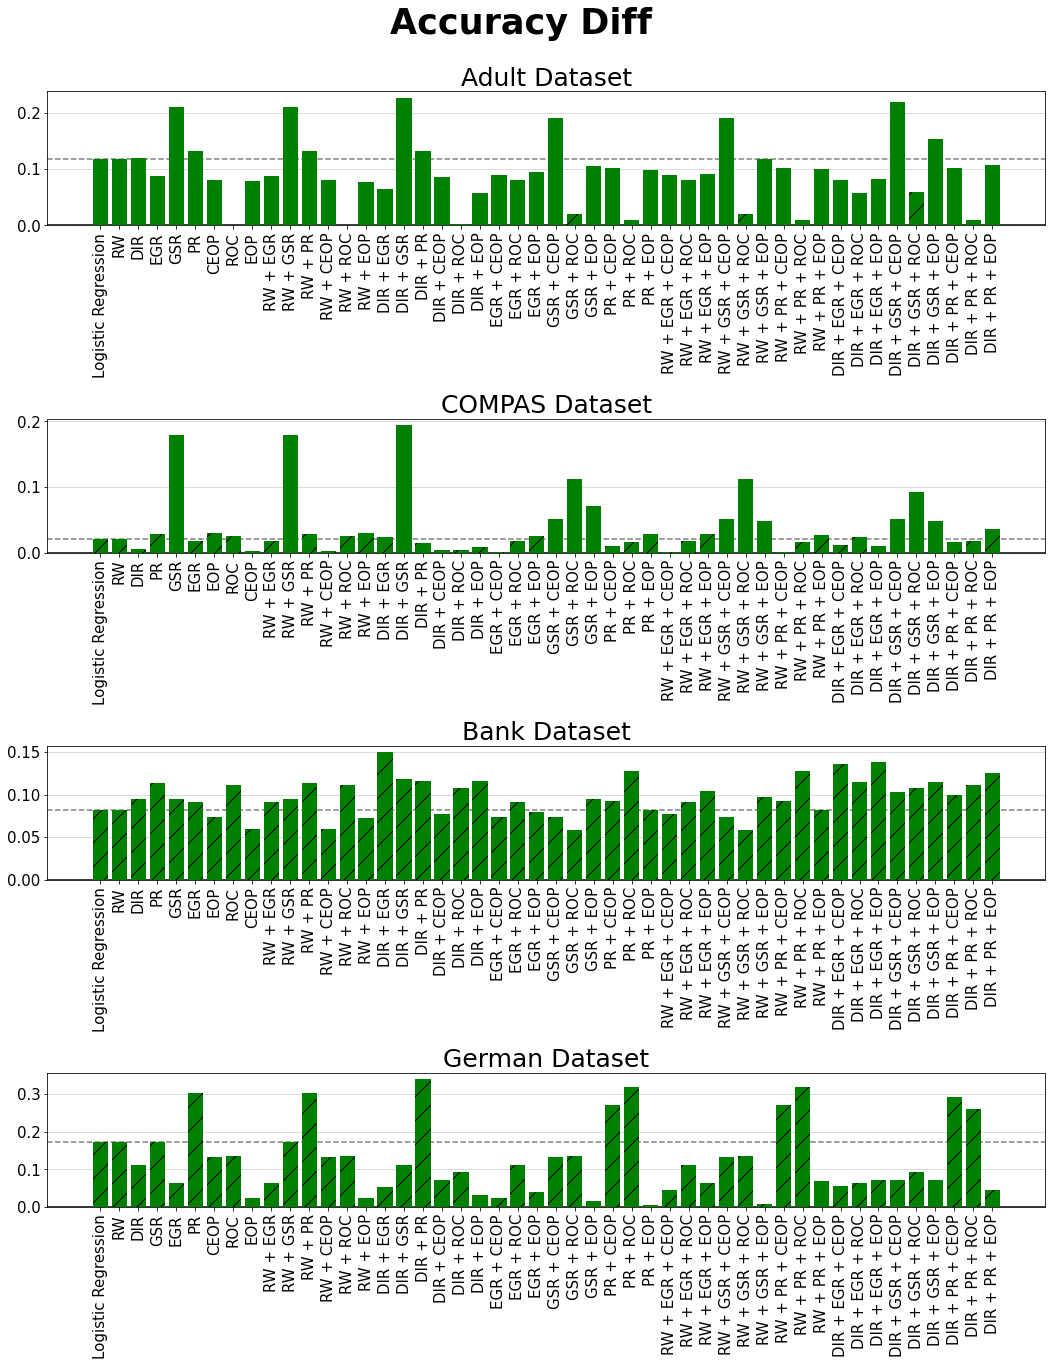

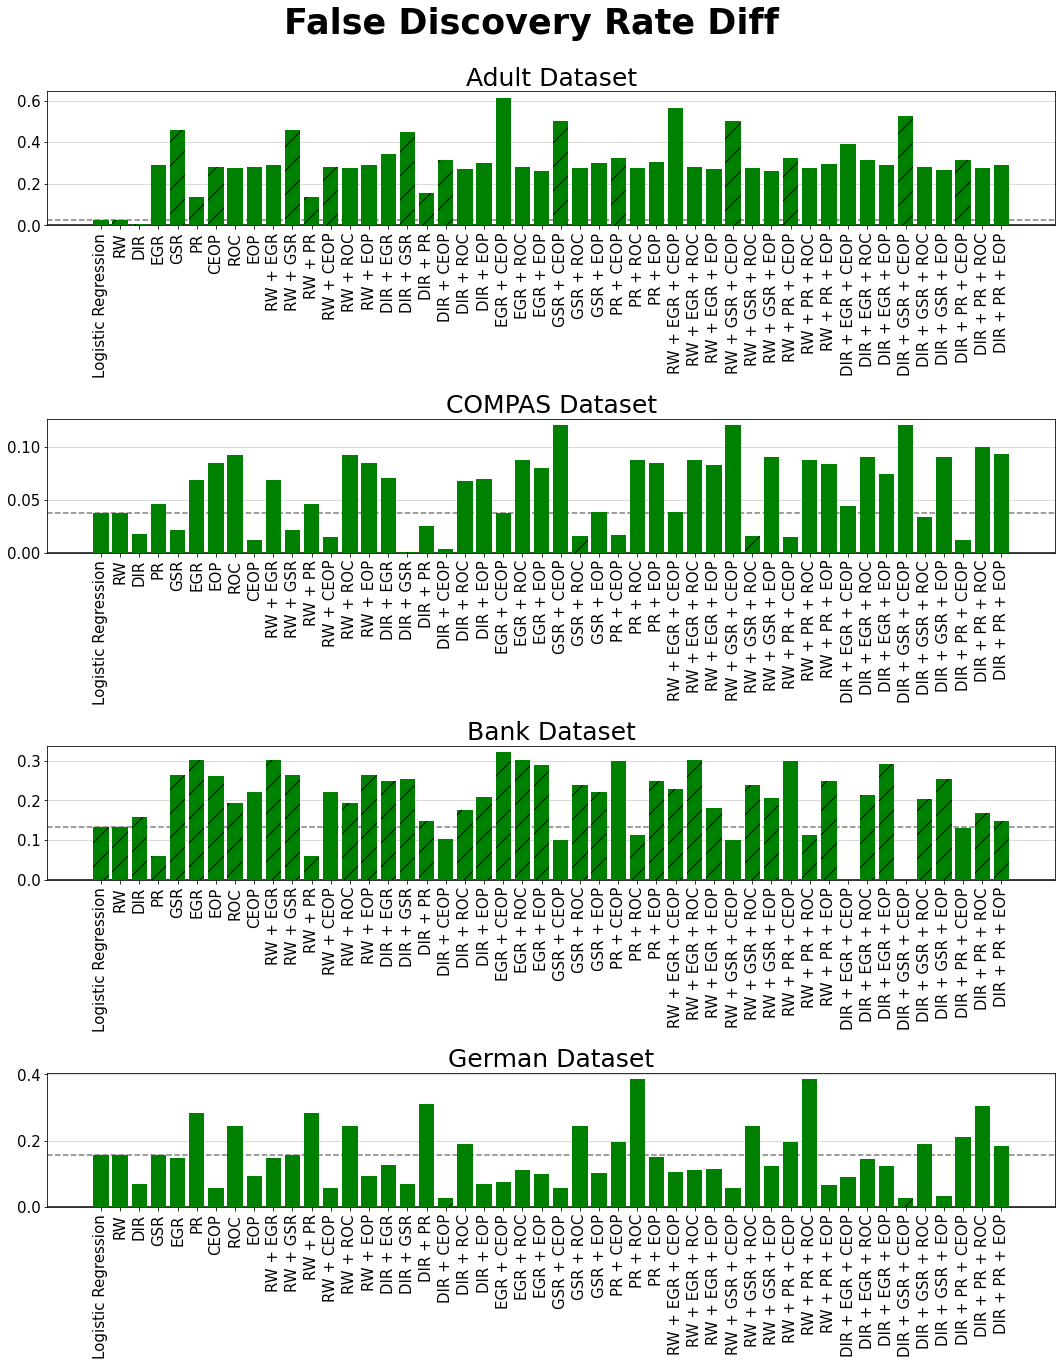

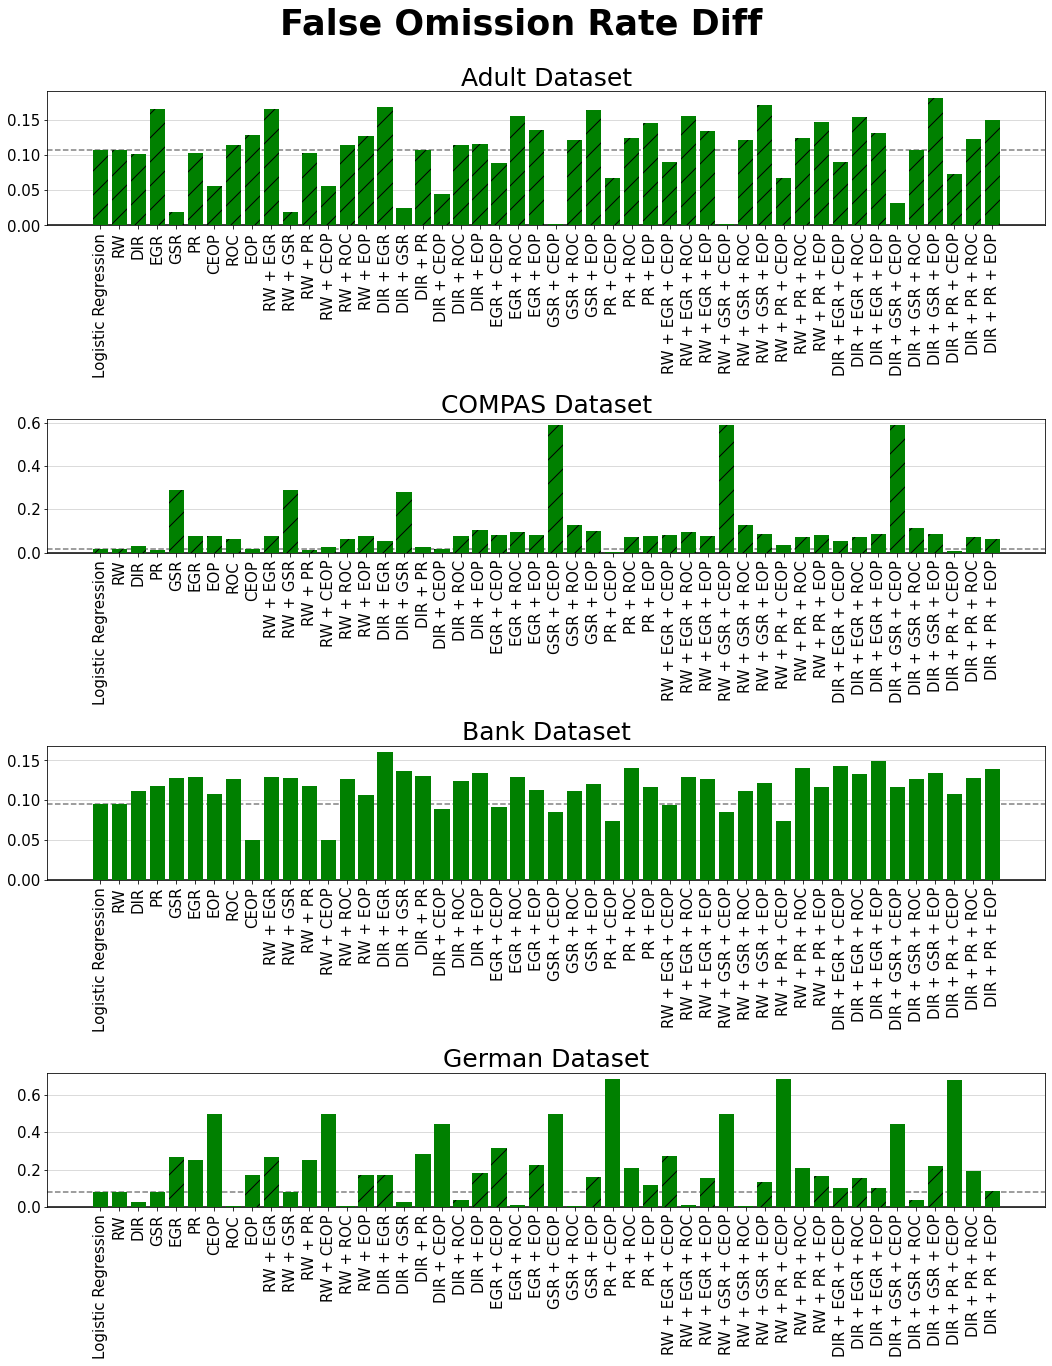

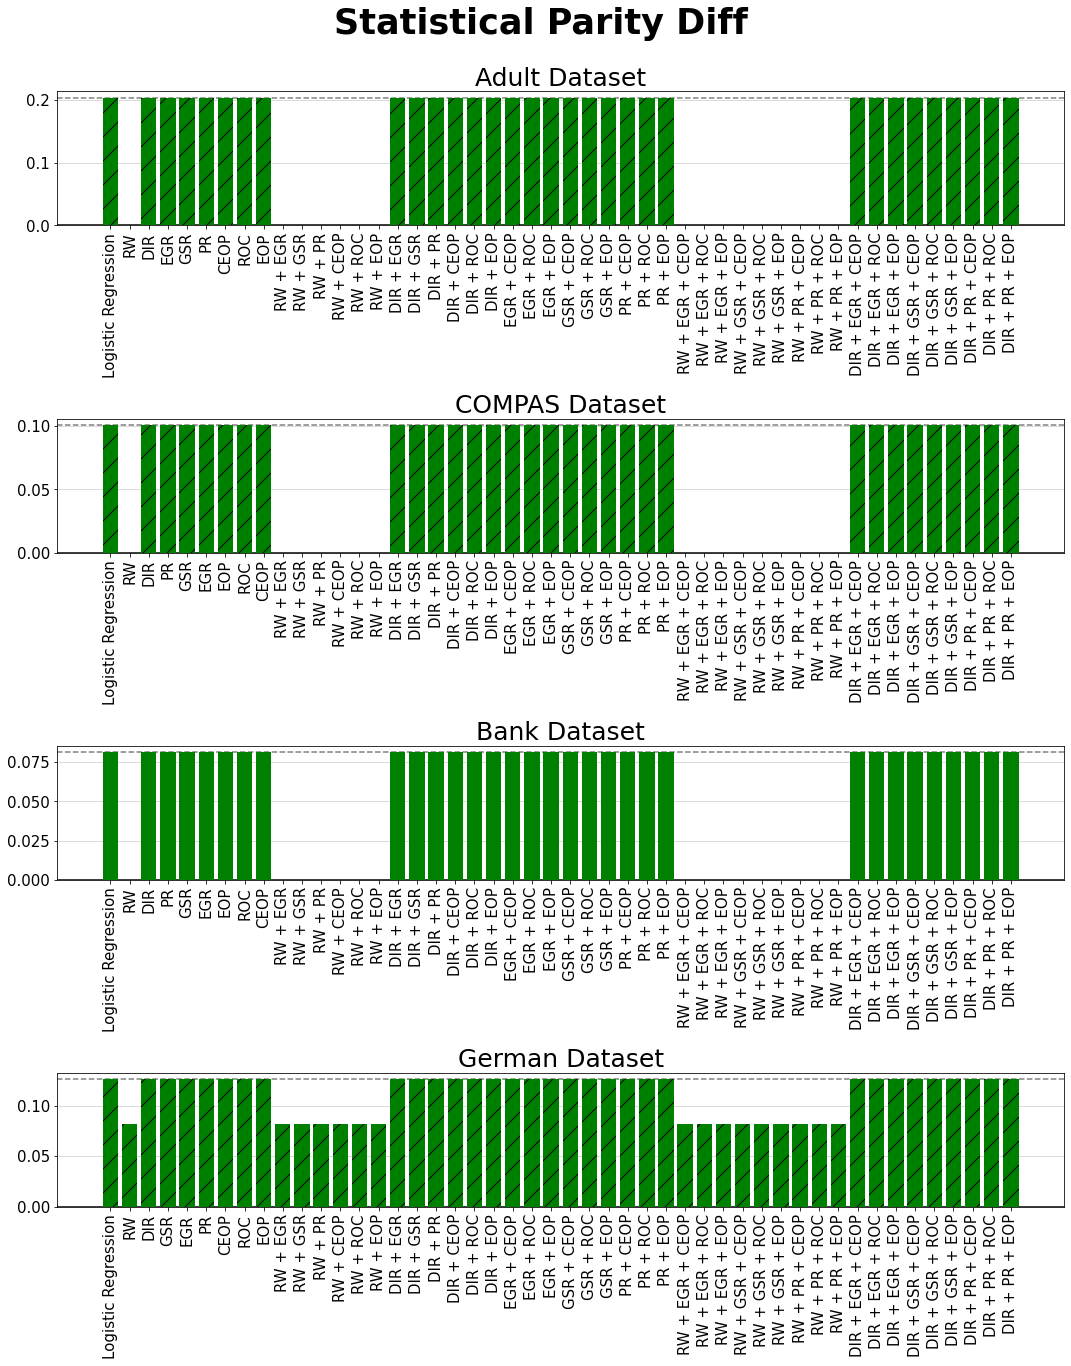

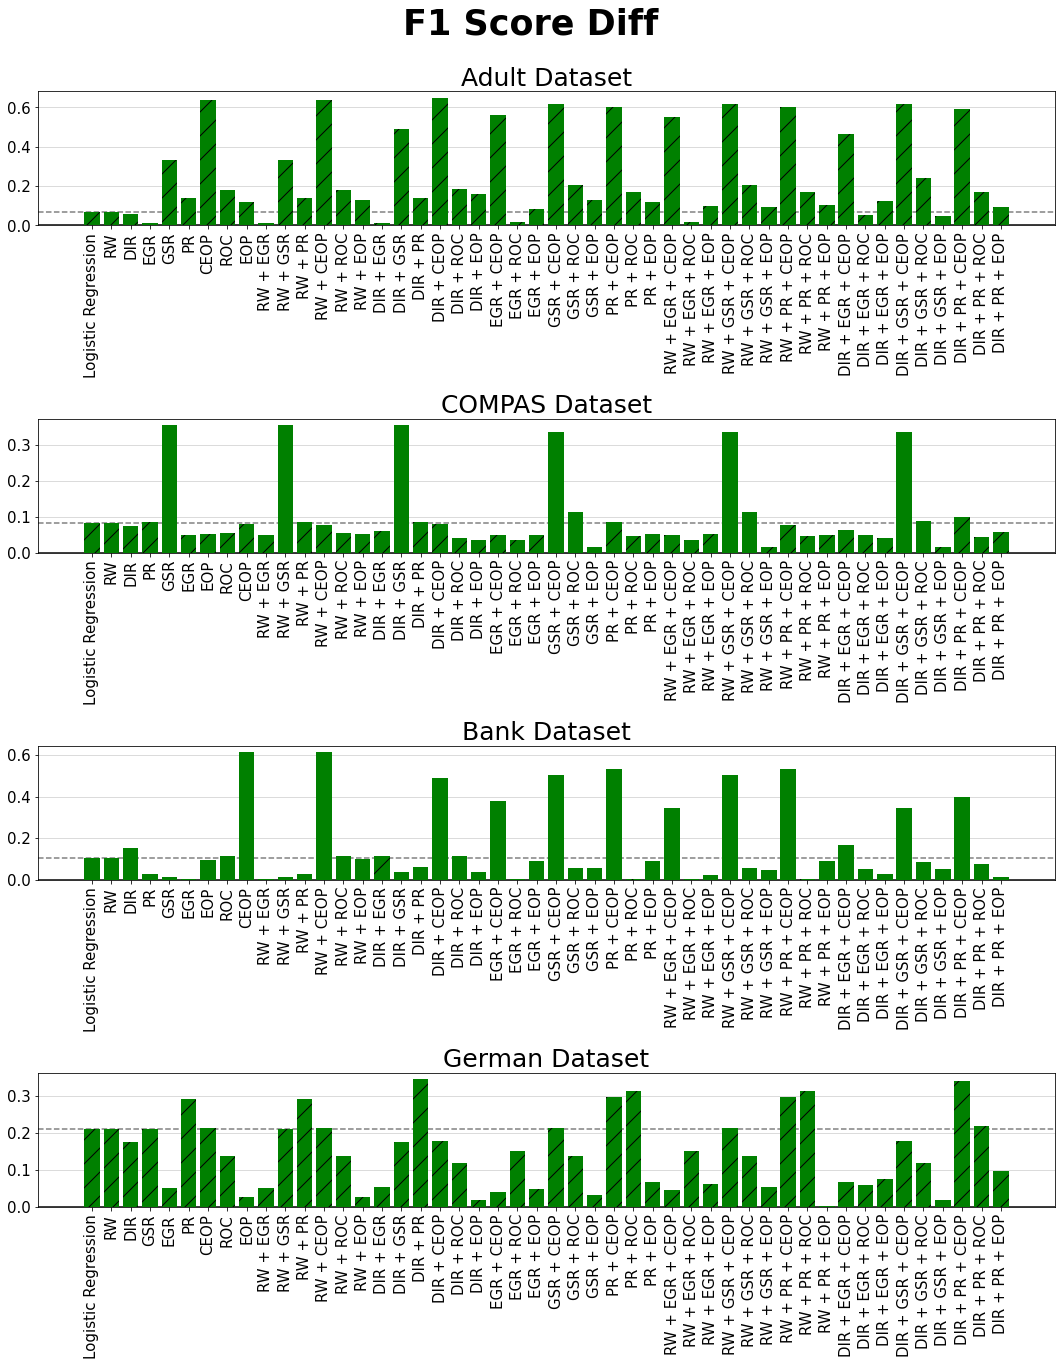

In [37]:
def create_diff_graph(fairness_metric):
    pattern = []
    for val in adult_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in compas_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in bank_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in german_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    
    
    fig, ax = plt.subplots(4, figsize=(15, 20))
    
    ax[0].patch.set_facecolor('white')
    ax[0].patch.set_alpha(1.0)
    ax[0].set_title("Adult Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(adult_df[fairness_metric])
    Labels=list(adult_df["Adult"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[0])
    plt.xticks(y_pos, Labels)
    for i in range(len(adult_df["Adult"])):
        pattern = "/" if vals[i] < 0 else " "
        ax[0].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[0].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[0].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[0].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[1].patch.set_facecolor('white')
    ax[1].patch.set_alpha(1.0)
    ax[1].set_title("COMPAS Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(compas_df[fairness_metric])
    Labels=list(compas_df["Compas"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[1])
    plt.xticks(y_pos, Labels)
    for i in range(len(compas_df["Compas"])):
        pattern = "/" if vals[i] < 0 else " "
        ax[1].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[1].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[1].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[1].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[2].patch.set_facecolor('white')
    ax[2].patch.set_alpha(1.0)
    ax[2].set_title("Bank Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(bank_df[fairness_metric])
    Labels=list(bank_df["Bank"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[2])
    plt.xticks(y_pos, Labels)
    for i in range(len(bank_df["Bank"])):
        pattern = "/" if vals[i] < 0 else " "
        ax[2].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[2].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[2].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[2].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[3].patch.set_facecolor('white')
    ax[3].patch.set_alpha(1.0)
    ax[3].set_title("German Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(german_df[fairness_metric])
    Labels=list(german_df["German"])
    y_pos=np.arange(len(Labels))
    plt.sca(ax[3])
    plt.xticks(y_pos, Labels)
    for i in range(len(german_df["German"])):
        pattern = "/" if vals[i] < 0 else " "
        ax[3].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[3].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[3].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[3].axhline(y = 0, color = 'black', linestyle = 'solid')
        
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.yaxis.grid(color="lightgrey")
        ax.set_axisbelow(True)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.xaxis.label.set_size(20)
    fig.suptitle(fairness_metric,fontweight="bold",fontsize=35)
    fig.patch.set_alpha(1.0)
    
    plt.savefig("R3/" + fairness_metric + ".png", bbox_inches='tight', )
    
create_diff_graph("False Positive Rate Diff")
create_diff_graph("False Negative Rate Diff")
create_diff_graph("Accuracy Diff")
create_diff_graph("False Discovery Rate Diff")
create_diff_graph("False Omission Rate Diff")
create_diff_graph("Statistical Parity Diff")
create_diff_graph("F1 Score Diff")

In [8]:
adult_base = adult_df.iloc[0]
adult_base_abs = abs(adult_df.iloc[0,1:])
#temp = adult_base < adult_base
#adult_int = pandas.DataFrame(data=[sum(temp)/len(temp)], index=['Logistic Regression'], columns=['% Improved from Logistic Regression'])
adult_int = pandas.DataFrame(columns=['% Improved from Base', 'Priv worse than Unpriv'])

for i in adult_df.index:
    diffs = [metric for metric in adult_df.columns if "Diff" in metric]
    privs = adult_df.loc[i, diffs] > 0
    temp = abs(adult_df.iloc[i,1:]) < adult_base_abs
    f1i = list(adult_df.columns).index("F1 Score")
    temp[0], temp[f1i] = adult_df.loc[i, 'Accuracy'] > adult_base['Accuracy'], adult_df.loc[i, 'F1 Score'] > adult_base['F1 Score']
    adult_int.loc[len(adult_int.index)] = [(sum(temp)/len(temp))*100, (sum(privs)/len(privs))*100]
adult_int.index = adult_df['Adult']
adult_int

% Improved from Base  Priv worse than Unpriv
Adult                                                            
Logistic Regression              0.000000               28.571429
RW                               8.695652               28.571429
DIR                             47.826087               28.571429
EGR                             43.478261               57.142857
GSR                             39.130435               28.571429
PR                              30.434783               28.571429
CEOP                            30.434783               28.571429
ROC                             43.478261               42.857143
EOP                             47.826087               57.142857
RW + EGR                        52.173913               57.142857
RW + GSR                        47.826087               28.571429
RW + PR                         39.130435               28.571429
RW + CEOP                       39.130435               28.571429
RW + ROC                        52.173913               42.857143
RW + EOP                        52.173913               57.142857
DIR + EGR                       47.826087               42.857143
DIR + GSR                       39.130435               42.857143
DIR + PR                        26.086957               28.571429
DIR + CEOP                      43.478261               28.571429
DIR + ROC                       43.478261               28.571429
DIR + EOP                       39.130435               57.142857
EGR + CEOP                      43.478261               42.857143
EGR + ROC                       43.478261               42.857143
EGR + EOP                       39.130435               28.571429
GSR + CEOP                      39.130435               28.571429
GSR + ROC                       43.478261               28.571429
GSR + EOP                       30.434783               57.142857
PR + CEOP                       34.782609               28.571429
PR + ROC                        43.478261               42.857143
PR + EOP                        34.782609               57.142857
RW + EGR + CEOP                 52.173913               42.857143
RW + EGR + ROC                  52.173913               42.857143
RW + EGR + EOP                  47.826087               57.142857
RW + GSR + CEOP                 47.826087               28.571429
RW + GSR + ROC                  52.173913               28.571429
RW + GSR + EOP                  39.130435               28.571429
RW + PR + CEOP                  43.478261               28.571429
RW + PR + ROC                   52.173913               42.857143
RW + PR + EOP                   43.478261               57.142857
DIR + EGR + CEOP                43.478261               42.857143
DIR + EGR + ROC                 43.478261               42.857143
DIR + EGR + EOP                 39.130435               57.142857
DIR + GSR + CEOP                39.130435               42.857143
DIR + GSR + ROC                 43.478261               28.571429
DIR + GSR + EOP                 34.782609               57.142857
DIR + PR + CEOP                 34.782609               28.571429
DIR + PR + ROC                  43.478261               42.857143
DIR + PR + EOP                  34.782609               57.142857

In [9]:
compas_base = compas_df.iloc[0]
compas_base_abs = abs(compas_df.iloc[0,1:])
#temp = compas_base < compas_base
#compas_int = pandas.DataFrame(data=[sum(temp)/len(temp)], index=['Logistic Regression'], columns=['% Improved from Logistic Regression'])
compas_int = pandas.DataFrame(columns=['% Improved from Base', 'Priv worse than Unpriv'])

for i in compas_df.index:
    diffs = [metric for metric in compas_df.columns if "Diff" in metric]
    privs = compas_df.loc[i, diffs] > 0
    temp = abs(compas_df.iloc[i,1:]) < compas_base_abs
    f1i = list(compas_df.columns).index("F1 Score")
    temp[0], temp[f1i] = compas_df.loc[i, 'Accuracy'] > compas_base['Accuracy'], compas_df.loc[i, 'F1 Score'] > compas_base['F1 Score']
    compas_int.loc[len(compas_int.index)] = [(sum(temp)/len(temp))*100, (sum(privs)/len(privs))*100]
compas_int.index = compas_df['Compas']
compas_int

% Improved from Base  Priv worse than Unpriv
Compas                                                           
Logistic Regression              0.000000               28.571429
RW                               8.695652               28.571429
DIR                             43.478261               28.571429
PR                              39.130435               28.571429
GSR                             30.434783               57.142857
EGR                             47.826087               28.571429
EOP                             43.478261               42.857143
ROC                             43.478261               42.857143
CEOP                            34.782609               28.571429
RW + EGR                        56.521739               28.571429
RW + GSR                        39.130435               57.142857
RW + PR                         47.826087               28.571429
RW + CEOP                       34.782609               28.571429
RW + ROC                        52.173913               42.857143
RW + EOP                        52.173913               42.857143
DIR + EGR                       43.478261               28.571429
DIR + GSR                       26.086957               42.857143
DIR + PR                        39.130435               28.571429
DIR + CEOP                      52.173913               28.571429
DIR + ROC                       47.826087               28.571429
DIR + EOP                       47.826087               14.285714
EGR + CEOP                      39.130435               28.571429
EGR + ROC                       47.826087               28.571429
EGR + EOP                       43.478261               28.571429
GSR + CEOP                      26.086957               57.142857
GSR + ROC                       43.478261               28.571429
GSR + EOP                       39.130435               42.857143
PR + CEOP                       39.130435               28.571429
PR + ROC                        47.826087               42.857143
PR + EOP                        43.478261               42.857143
RW + EGR + CEOP                 47.826087               28.571429
RW + EGR + ROC                  56.521739               28.571429
RW + EGR + EOP                  52.173913               42.857143
RW + GSR + CEOP                 34.782609               57.142857
RW + GSR + ROC                  52.173913               28.571429
RW + GSR + EOP                  47.826087               57.142857
RW + PR + CEOP                  43.478261               28.571429
RW + PR + ROC                   56.521739               42.857143
RW + PR + EOP                   52.173913               42.857143
DIR + EGR + CEOP                52.173913               28.571429
DIR + EGR + ROC                 43.478261               42.857143
DIR + EGR + EOP                 47.826087               14.285714
DIR + GSR + CEOP                26.086957               57.142857
DIR + GSR + ROC                 47.826087               57.142857
DIR + GSR + EOP                 39.130435               57.142857
DIR + PR + CEOP                 43.478261               42.857143
DIR + PR + ROC                  47.826087               28.571429
DIR + PR + EOP                  43.478261               42.857143

In [10]:
bank_base = bank_df.iloc[0]
bank_base_abs = abs(bank_df.iloc[0,1:])
#temp = bank_base < bank_base
#bank_int = pandas.DataFrame(data=[sum(temp)/len(temp)], index=['Logistic Regression'], columns=['% Improved from Logistic Regression'])
bank_int = pandas.DataFrame(columns=['% Improved from Base', 'Priv worse than Unpriv'])

for i in bank_df.index:
    diffs = [metric for metric in bank_df.columns if "Diff" in metric]
    privs = bank_df.loc[i, diffs] > 0
    temp = abs(bank_df.iloc[i,1:]) < bank_base_abs
    f1i = list(bank_df.columns).index("F1 Score")
    temp[0], temp[f1i] = bank_df.loc[i, 'Accuracy'] > bank_base['Accuracy'], bank_df.loc[i, 'F1 Score'] > bank_base['F1 Score']
    bank_int.loc[len(bank_int.index)] = [(sum(temp)/len(temp))*100, (sum(privs)/len(privs))*100]
bank_int.index = bank_df['Bank']
bank_int

% Improved from Base  Priv worse than Unpriv
Bank                                                             
Logistic Regression              0.000000               57.142857
RW                               8.695652               42.857143
DIR                             39.130435               57.142857
PR                              30.434783               57.142857
GSR                             39.130435               57.142857
EGR                             39.130435               57.142857
EOP                             52.173913               42.857143
ROC                             43.478261               57.142857
CEOP                            26.086957               71.428571
RW + EGR                        47.826087               42.857143
RW + GSR                        47.826087               42.857143
RW + PR                         39.130435               42.857143
RW + CEOP                       34.782609               57.142857
RW + ROC                        52.173913               42.857143
RW + EOP                        56.521739               28.571429
DIR + EGR                       43.478261               42.857143
DIR + GSR                       47.826087               42.857143
DIR + PR                        47.826087               57.142857
DIR + CEOP                      52.173913               71.428571
DIR + ROC                       43.478261               42.857143
DIR + EOP                       47.826087               42.857143
EGR + CEOP                      43.478261               57.142857
EGR + ROC                       39.130435               57.142857
EGR + EOP                       47.826087               42.857143
GSR + CEOP                      52.173913               71.428571
GSR + ROC                       39.130435               57.142857
GSR + EOP                       43.478261               42.857143
PR + CEOP                       30.434783               71.428571
PR + ROC                        52.173913               57.142857
PR + EOP                        39.130435               71.428571
RW + EGR + CEOP                 56.521739               42.857143
RW + EGR + ROC                  47.826087               42.857143
RW + EGR + EOP                  52.173913               57.142857
RW + GSR + CEOP                 60.869565               57.142857
RW + GSR + ROC                  47.826087               42.857143
RW + GSR + EOP                  52.173913               28.571429
RW + PR + CEOP                  39.130435               57.142857
RW + PR + ROC                   60.869565               42.857143
RW + PR + EOP                   47.826087               57.142857
DIR + EGR + CEOP                43.478261               42.857143
DIR + EGR + ROC                 47.826087               42.857143
DIR + EGR + EOP                 47.826087               42.857143
DIR + GSR + CEOP                43.478261               42.857143
DIR + GSR + ROC                 47.826087               42.857143
DIR + GSR + EOP                 47.826087               42.857143
DIR + PR + CEOP                 43.478261               71.428571
DIR + PR + ROC                  47.826087               57.142857
DIR + PR + EOP                  47.826087               71.428571

In [11]:
german_base = german_df.iloc[0]
german_base_abs = abs(german_df.iloc[0,1:])
#temp = german_base < german_base
#german_int = pandas.DataFrame(data=[sum(temp)/len(temp)], index=['Logistic Regression'], columns=['% Improved from Logistic Regression'])
german_int = pandas.DataFrame(columns=['% Improved from Base', 'Priv worse than Unpriv'])

for i in german_df.index:
    diffs = [metric for metric in german_df.columns if "Diff" in metric]
    privs = german_df.loc[i, diffs] > 0
    temp = abs(german_df.iloc[i,1:]) < german_base_abs
    f1i = list(german_df.columns).index("F1 Score")
    temp[0], temp[f1i] = german_df.loc[i, 'Accuracy'] > german_base['Accuracy'], german_df.loc[i, 'F1 Score'] > german_base['F1 Score']
    german_int.loc[len(german_int.index)] = [(sum(temp)/len(temp))*100, (sum(privs)/len(privs))*100]
german_int.index = german_df['German']
german_int

% Improved from Base  Priv worse than Unpriv
German                                                           
Logistic Regression              0.000000               42.857143
RW                               8.695652               42.857143
DIR                             47.826087               42.857143
GSR                              0.000000               42.857143
EGR                             52.173913               28.571429
PR                              21.739130               57.142857
CEOP                            26.086957               42.857143
ROC                             47.826087               57.142857
EOP                             34.782609               28.571429
RW + EGR                        60.869565               28.571429
RW + GSR                         8.695652               42.857143
RW + PR                         30.434783               57.142857
RW + CEOP                       34.782609               42.857143
RW + ROC                        56.521739               57.142857
RW + EOP                        43.478261               28.571429
DIR + EGR                       39.130435               28.571429
DIR + GSR                       47.826087               42.857143
DIR + PR                        21.739130               57.142857
DIR + CEOP                      43.478261               28.571429
DIR + ROC                       52.173913               42.857143
DIR + EOP                       52.173913               28.571429
EGR + CEOP                      43.478261               14.285714
EGR + ROC                       56.521739               42.857143
EGR + EOP                       52.173913               14.285714
GSR + CEOP                      26.086957               42.857143
GSR + ROC                       47.826087               57.142857
GSR + EOP                       34.782609               28.571429
PR + CEOP                       26.086957               42.857143
PR + ROC                        26.086957               57.142857
PR + EOP                        47.826087               57.142857
RW + EGR + CEOP                 65.217391               14.285714
RW + EGR + ROC                  65.217391               42.857143
RW + EGR + EOP                  60.869565               28.571429
RW + GSR + CEOP                 34.782609               42.857143
RW + GSR + ROC                  56.521739               57.142857
RW + GSR + EOP                  43.478261               42.857143
RW + PR + CEOP                  34.782609               42.857143
RW + PR + ROC                   34.782609               57.142857
RW + PR + EOP                   60.869565               42.857143
DIR + EGR + CEOP                47.826087               28.571429
DIR + EGR + ROC                 52.173913               28.571429
DIR + EGR + EOP                 52.173913               42.857143
DIR + GSR + CEOP                43.478261               28.571429
DIR + GSR + ROC                 52.173913               42.857143
DIR + GSR + EOP                 47.826087               42.857143
DIR + PR + CEOP                 26.086957               42.857143
DIR + PR + ROC                  30.434783               57.142857
DIR + PR + EOP                  43.478261               42.857143